In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df = pd.read_csv('mushrooms.csv').iloc[:,1:]
df = df.apply(LabelEncoder().fit_transform)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [9]:
df = PCA(n_components = 2).fit_transform(df.values)

In [10]:
def euclidean_distance(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [11]:
def random_centroids(k, X):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroid = X[np.random.choice(range(X.shape[0]))]
        centroids[i] = centroid
    return centroids

In [12]:
r_centroids = random_centroids(5, df)

In [13]:
r_centroids

array([[ 1.42710835,  2.48350719],
       [ 1.23265319, -0.38011562],
       [ 0.89711953,  3.49690878],
       [-1.84096865,  6.68587237],
       [-1.64243862, -0.17343433]])

In [14]:
results = []
for i in range(df.shape[0]):
    results.append(np.argmin([euclidean_distance(df[i,:], r_centroids[x, :]) for x in range(5)]))
Y = np.array(results)

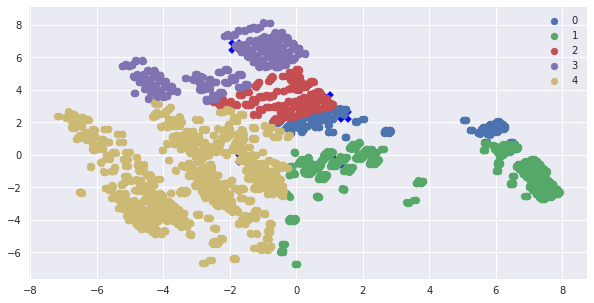

In [15]:
fig = plt.figure(figsize=(10,5))
colors = sns.color_palette()
plt.scatter(r_centroids[:,0], r_centroids[:,1], color='b',marker='X', s=200)
for no, i in enumerate(np.unique(Y)):
    plt.scatter(df[Y==i,0], df[Y==i,1], color=colors[no],label = no)
plt.legend()
plt.show()